In [50]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For time stamps
from datetime import datetime
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf


In [51]:
sp500df = pd.read_csv("sp500/sp500_companies.csv")
sp500df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             500 non-null    object 
 1   Symbol               500 non-null    object 
 2   Shortname            500 non-null    object 
 3   Longname             500 non-null    object 
 4   Sector               500 non-null    object 
 5   Industry             500 non-null    object 
 6   Currentprice         500 non-null    float64
 7   Marketcap            500 non-null    float64
 8   Ebitda               469 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 500 non-null    object 
 11  State                481 non-null    object 
 12  Country              500 non-null    object 
 13  Fulltimeemployees    472 non-null    float64
 14  Longbusinesssummary  500 non-null    object 
 15  Weight               500 non-null    flo

In [52]:
sp500df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,159.59,2.675490e+12,1.282180e+11,0.112,Cupertino,CA,United States,100000.0,"Apple Inc. designs, manufactures, and markets ...",0.065893
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,294.39,2.210270e+12,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.054436
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2665.61,1.820760e+12,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044842
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2673.81,1.814980e+12,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044700
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3062.08,1.558120e+12,5.917500e+10,0.094,Seattle,WA,United States,1608000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038374


In [53]:
sp500df.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [54]:
a = len(sp500df)
a

500

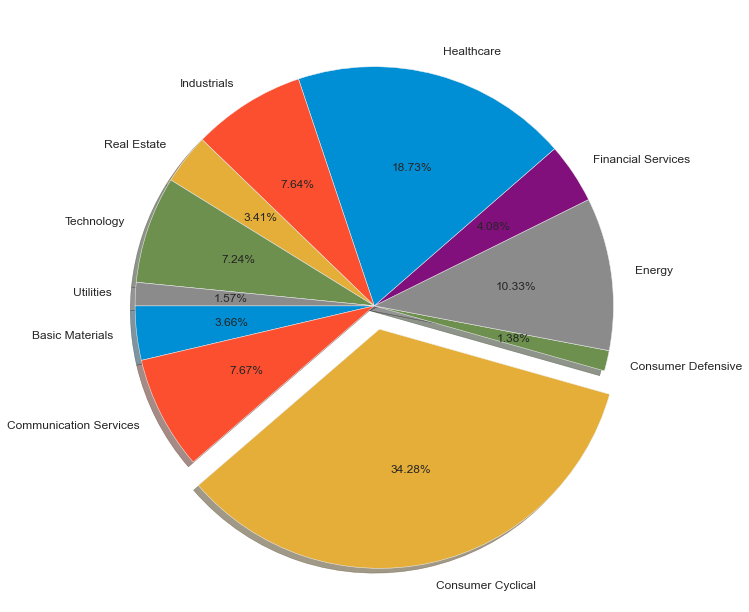

In [55]:
# Create the chart for Revenuegrowth Distribution by sector:

SectorDistribution = sp500df.groupby("Sector")["Revenuegrowth"].sum()
SectorDistribution


plt.rc('font', size=12)  
explode = (0,0,0.1,0,0,0,0,0,0,0,0)
SectorDistribution.plot(kind = "pie",explode=explode, shadow=True,startangle=180,autopct="%1.2f%%",figsize=(11,11))
plt.axis("off")
plt.savefig("Revenue_Dist_by_sector.png")

plt.show()


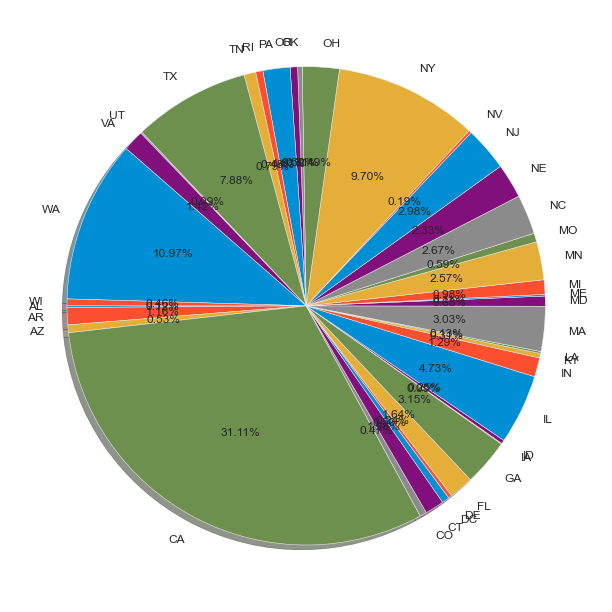

In [56]:
# Create the chart for Marketcap distribution by State:

SectorDistribution1 = sp500df.groupby("State")["Marketcap"].sum()
SectorDistribution1


plt.rc('font', size=12)  
SectorDistribution1.plot(kind = "pie", shadow=True,startangle=180,autopct="%1.2f%%",figsize=(11,11))
plt.axis("off")
plt.savefig("Marketcap_dist_by_State.png")

plt.show()



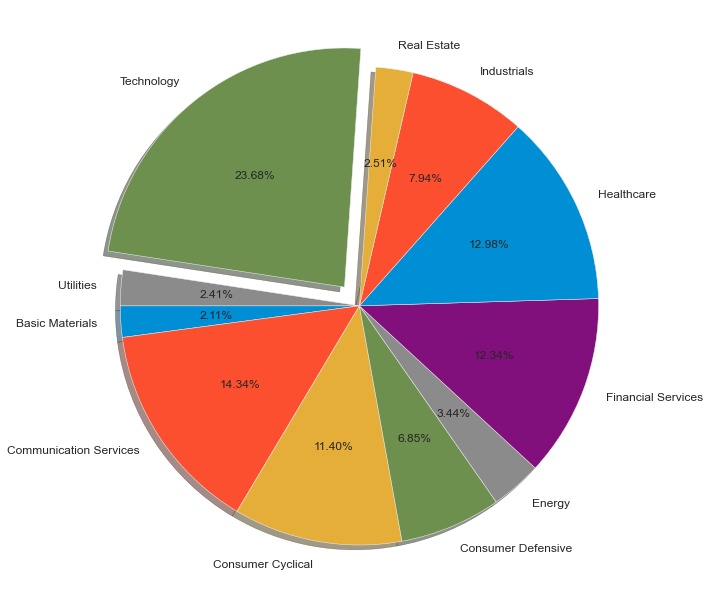

In [57]:
# Create the chart for Weight distribution by Sector:

SectorDistribution3 = sp500df.groupby("Sector")["Weight"].sum()
SectorDistribution3

plt.rc('font', size=12)  
explode = (0,0,0,0,0,0,0,0,0,0.1,0)
SectorDistribution3.plot(kind = "pie",explode=explode, shadow=True,startangle=180,autopct="%1.2f%%",figsize=(11,11))
plt.axis("off")
plt.savefig("Weight_dist_by_Sector.png")


plt.show()

In [58]:
start_date = datetime(2020,4,1)
end_date = datetime(2022,3,28)

# The tech stocks we'll use for this analysis
SectorLists = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
SectorNames = ["S&P500", "Financials","Consumer Discretionary","Consumer Staples","Health","Industrials","Information Tech","Materials","Real Estate","Tele Services","Utilities","Energy"]
# Set up End and Start times for data grab
SectorLists = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
CurrentYear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

for stock in SectorLists: 
    CurrentYear[SectorLists.index(stock)] = globals()[stock] = yf.download(stock, start_date, end_date)

    
# lastyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
# last_year_start = datetime(start_date.year-1, start_date.month, start_date.day)
# last_year_end = datetime(end_date.year-1, end_date.month, end_date.day)
# for stock in SectorLists:
#     lastyear[SectorLists.index(stock)] = globals()[stock] = yf.download(stock, last_year_start, last_year_end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


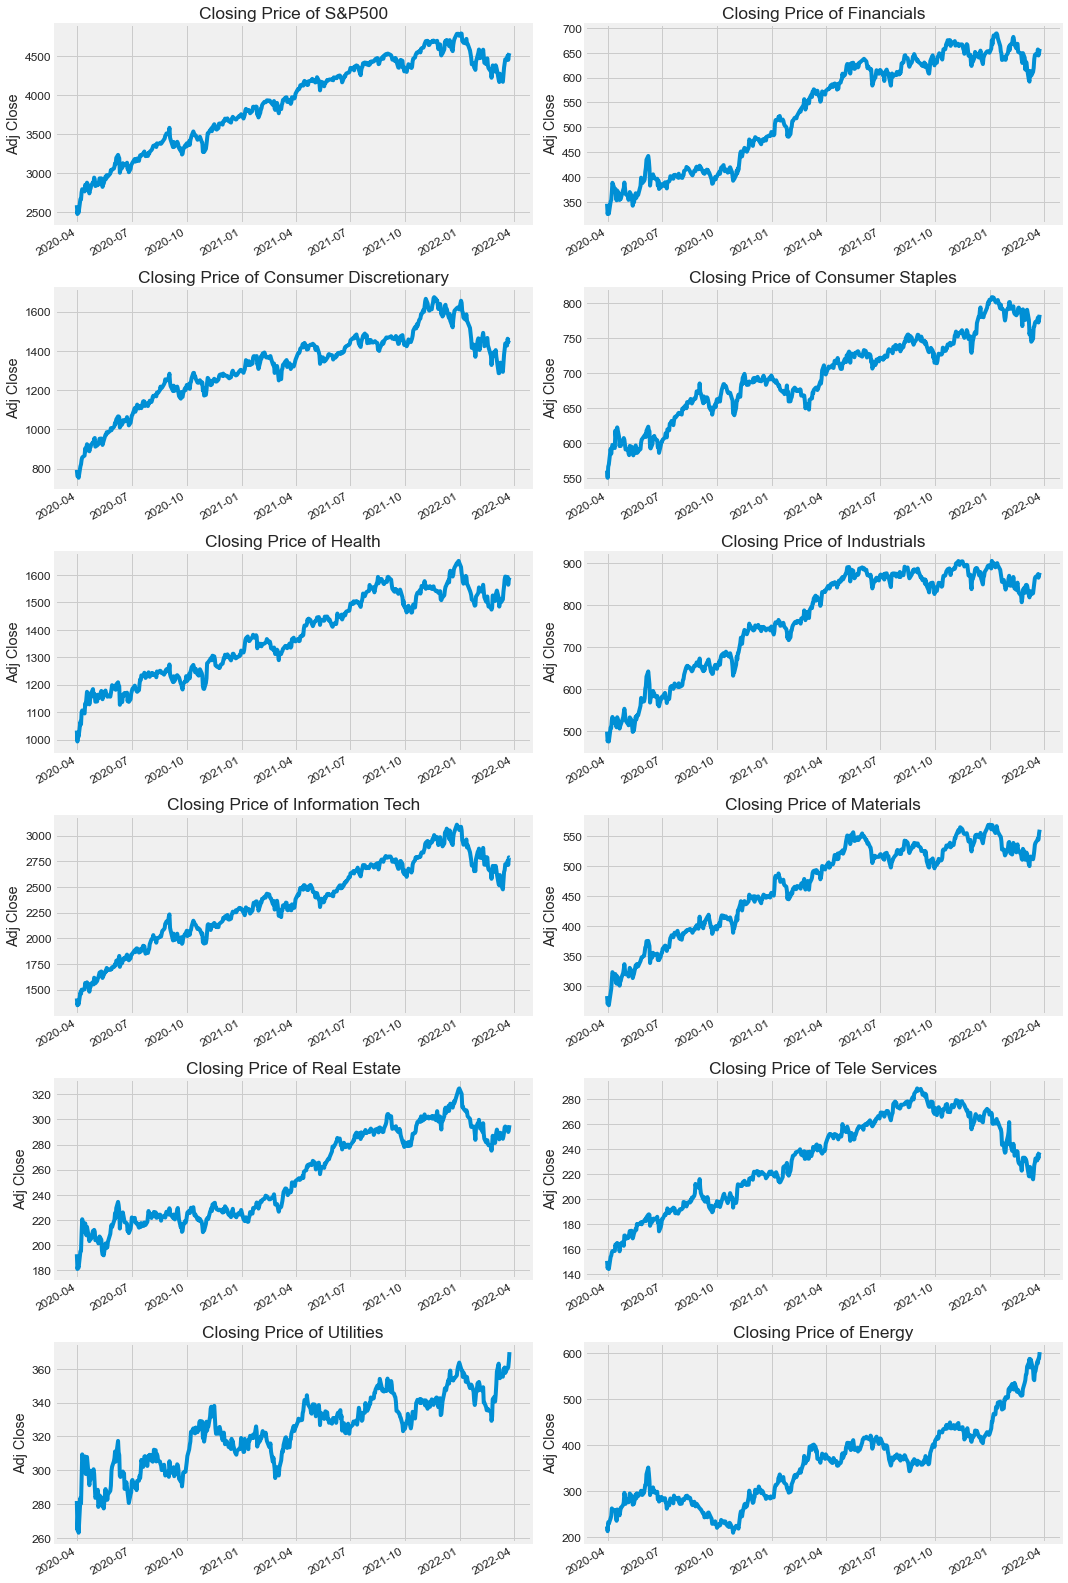

In [60]:
plt.figure(figsize=(15, 40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, sector in enumerate(SectorLists, 1):
    plt.subplot(11, 2, i)
    CurrentYear[i-1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {SectorNames[i - 1]}")
plt.tight_layout()

plt.savefig(f"Adj Close Change by Sectors({start_date.year}).png")    
